# Imports

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Path

In [3]:
# Creating the path of data
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/one-m-capstone/data/'

# Loading Data Frames

In [4]:
movies = pd.read_csv(DATA_PATH + 'processed_movies.csv').drop(columns=['Unnamed: 0'])
ratings = pd.read_csv(DATA_PATH + 'processed_ratings.csv').drop(columns=['Unnamed: 0'])
users = pd.read_csv(DATA_PATH + 'processed_users.csv').drop(columns=['Unnamed: 0'])
df = pd.read_csv(DATA_PATH + 'combined.csv').drop(columns=['Unnamed: 0'])

In [ ]:
# Removing Unnamed: 0 Columns
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation Children's Comedy
1,2,Jumanji (1995),Adventure Children's Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
users.head()

,user_id,gender,age,occupation,zip,age_elab,occ_elab
0,1,F,1,10,48067,Under 18,K-12 student
1,2,M,56,16,70072,56+,self-employed
2,3,M,25,15,55117,25-34,scientist
3,4,M,45,7,02460,45-49,executive/managerial
4,5,M,25,20,55455,25-34,writer


In [ ]:
df.head()

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip,age_elab,occ_elab
0,1,Toy Story (1995),Animation Children's Comedy,1,5,978824268,F,1,10,48067,Under 18,K-12 student
1,48,Pocahontas (1995),Animation Children's Musical Romance,1,5,978824351,F,1,10,48067,Under 18,K-12 student
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,Under 18,K-12 student
3,260,Star Wars: Episode IV - A New Hope (1977),Action Adventure Fantasy Sci-Fi,1,4,978300760,F,1,10,48067,Under 18,K-12 student
4,527,Schindler's List (1993),Drama War,1,5,978824195,F,1,10,48067,Under 18,K-12 student


# Visualizing Ratings

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


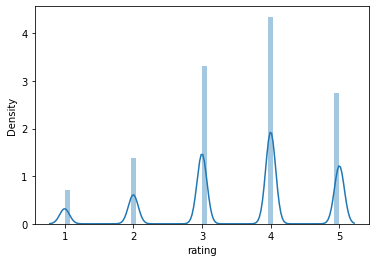

In [ ]:
sns.distplot(df['rating']);

Most ratings are above a 3 implying that most users like the movies they have seen. A rating of 4 stars is the most common. The problem for our recommendation model is we may have a difficult time finding out what movies a user doesn't like, making our model slightly weaker. Ultimately there is not a lot we can do about this.

# Genre Visualization

In [ ]:
genre_df = df.copy()

In [ ]:
genre_df['genres'] = genre_df['genres'].str.split(' ')
genre_df = genre_df.explode('genres')

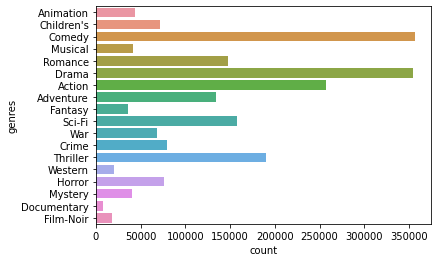

In [ ]:
sns.countplot(y='genres', data=genre_df, orient='h');

We can see from the chart that Comedy, Drama and Action movies are the most popular genres.